## Data Loading and Understanding

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('titanic.csv')

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
rows,columns = df.shape
print("number of rows = ",rows)
print("number of columns = ",columns)

number of rows =  891
number of columns =  12


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Summery

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#from infor there's some null values in age,cabin and embarked

df.isnull().sum() #summery of missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

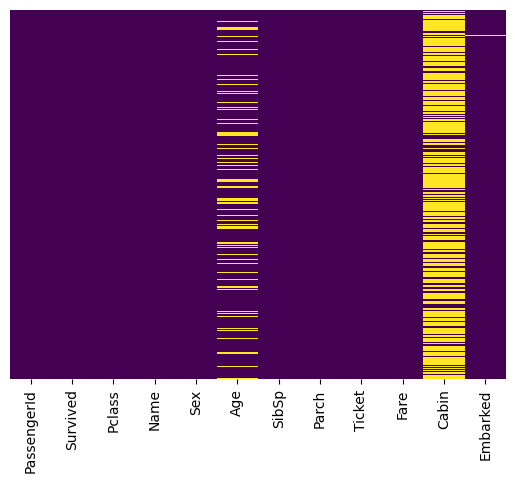

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\69772002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette = 'flare')


<Axes: xlabel='Pclass', ylabel='Age'>

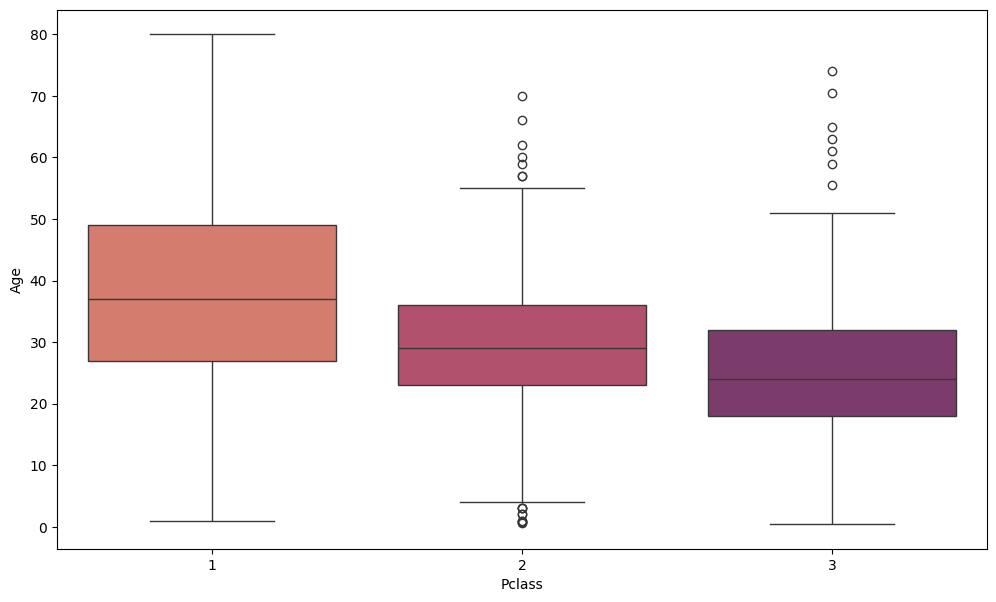

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette = 'flare')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

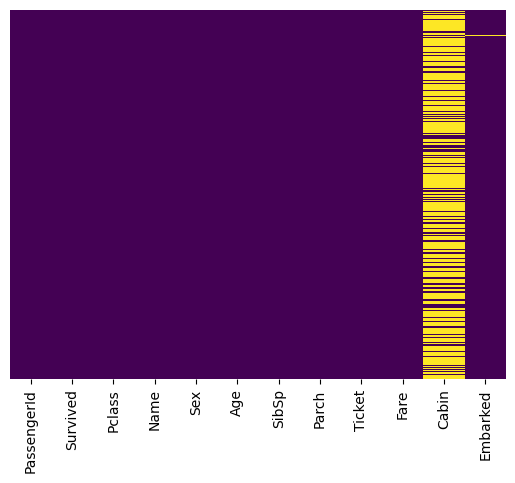

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

<Axes: >

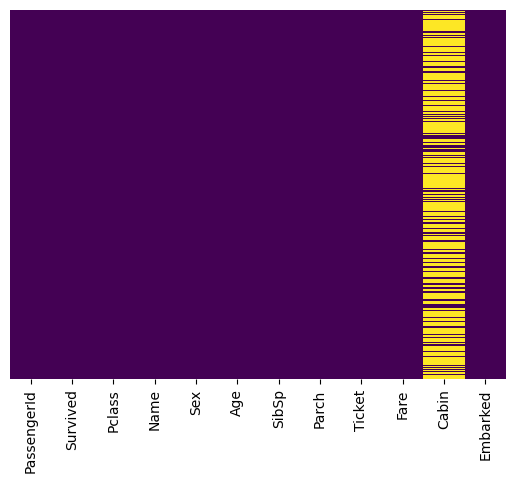

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df.drop(columns =['Cabin'],inplace = True)

## Univariate Analysis

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\73204567.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='Pclass',palette ='terrain_r')


<Axes: xlabel='Pclass', ylabel='count'>

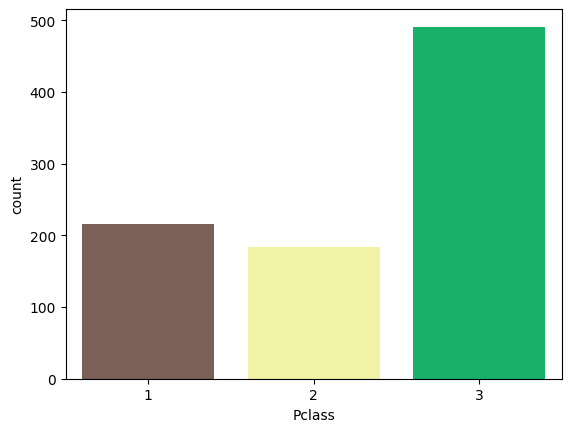

In [22]:
sns.countplot(df,x ='Pclass',palette ='terrain_r')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\1756138179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='Sex',palette ='deep')


<Axes: xlabel='Sex', ylabel='count'>

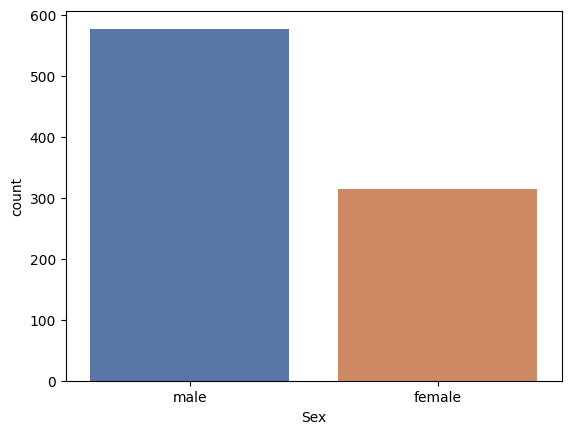

In [23]:
sns.countplot(df,x ='Sex',palette ='deep')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\2952430338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='Survived',palette ='Blues_r')


<Axes: xlabel='Survived', ylabel='count'>

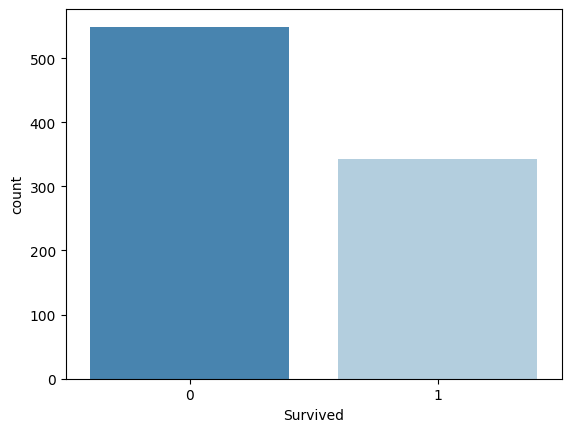

In [24]:
sns.countplot(df,x ='Survived',palette ='Blues_r')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\1881266592.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='Embarked',palette ='OrRd')


<Axes: xlabel='Embarked', ylabel='count'>

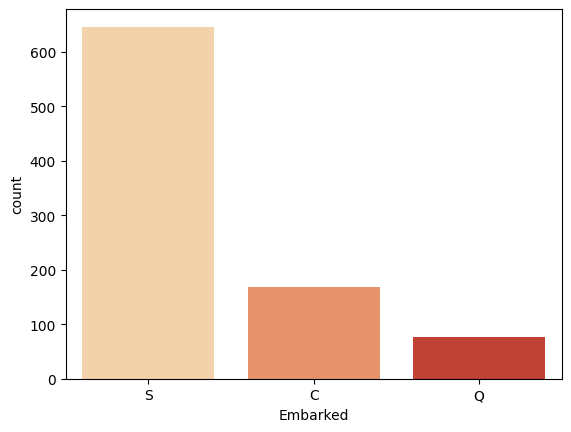

In [25]:
sns.countplot(df,x ='Embarked',palette ='OrRd')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\461303359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='Parch',palette ='PuOr_r')


<Axes: xlabel='Parch', ylabel='count'>

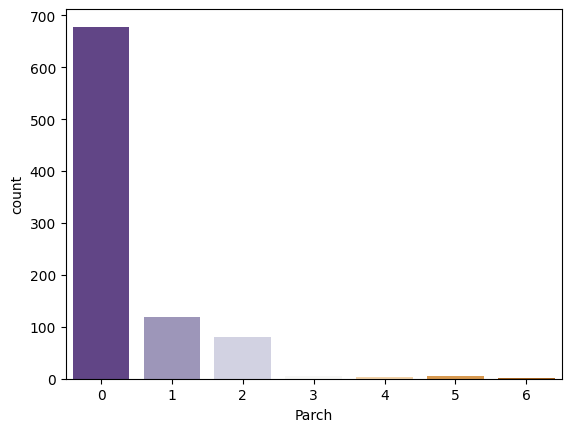

In [26]:
sns.countplot(df,x ='Parch',palette ='PuOr_r')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\3809661557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x ='SibSp',palette ='PuOr_r')


<Axes: xlabel='SibSp', ylabel='count'>

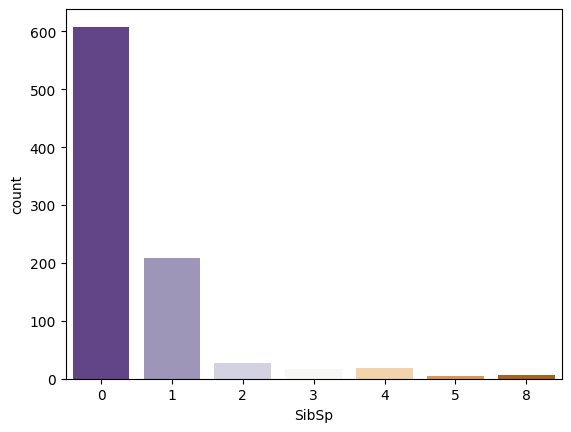

In [27]:
sns.countplot(df,x ='SibSp',palette ='PuOr_r')

<Axes: xlabel='Fare', ylabel='Count'>

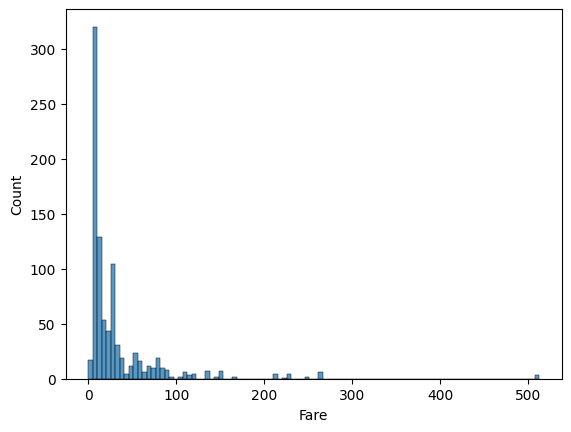

In [28]:
sns.histplot(df,x ='Fare',bins=100)

<Axes: xlabel='Age', ylabel='Count'>

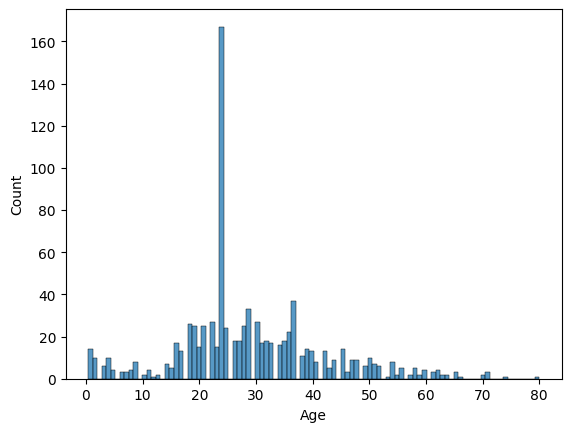

In [29]:
sns.histplot(df,x ='Age',bins=100)

## Bivariate Analysis

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\227399087.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('Age_Group')['Survived'].mean() * 100
C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\227399087.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_category = df.groupby('Fare_Category')['Survived'].mean() * 100
C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\227399087.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

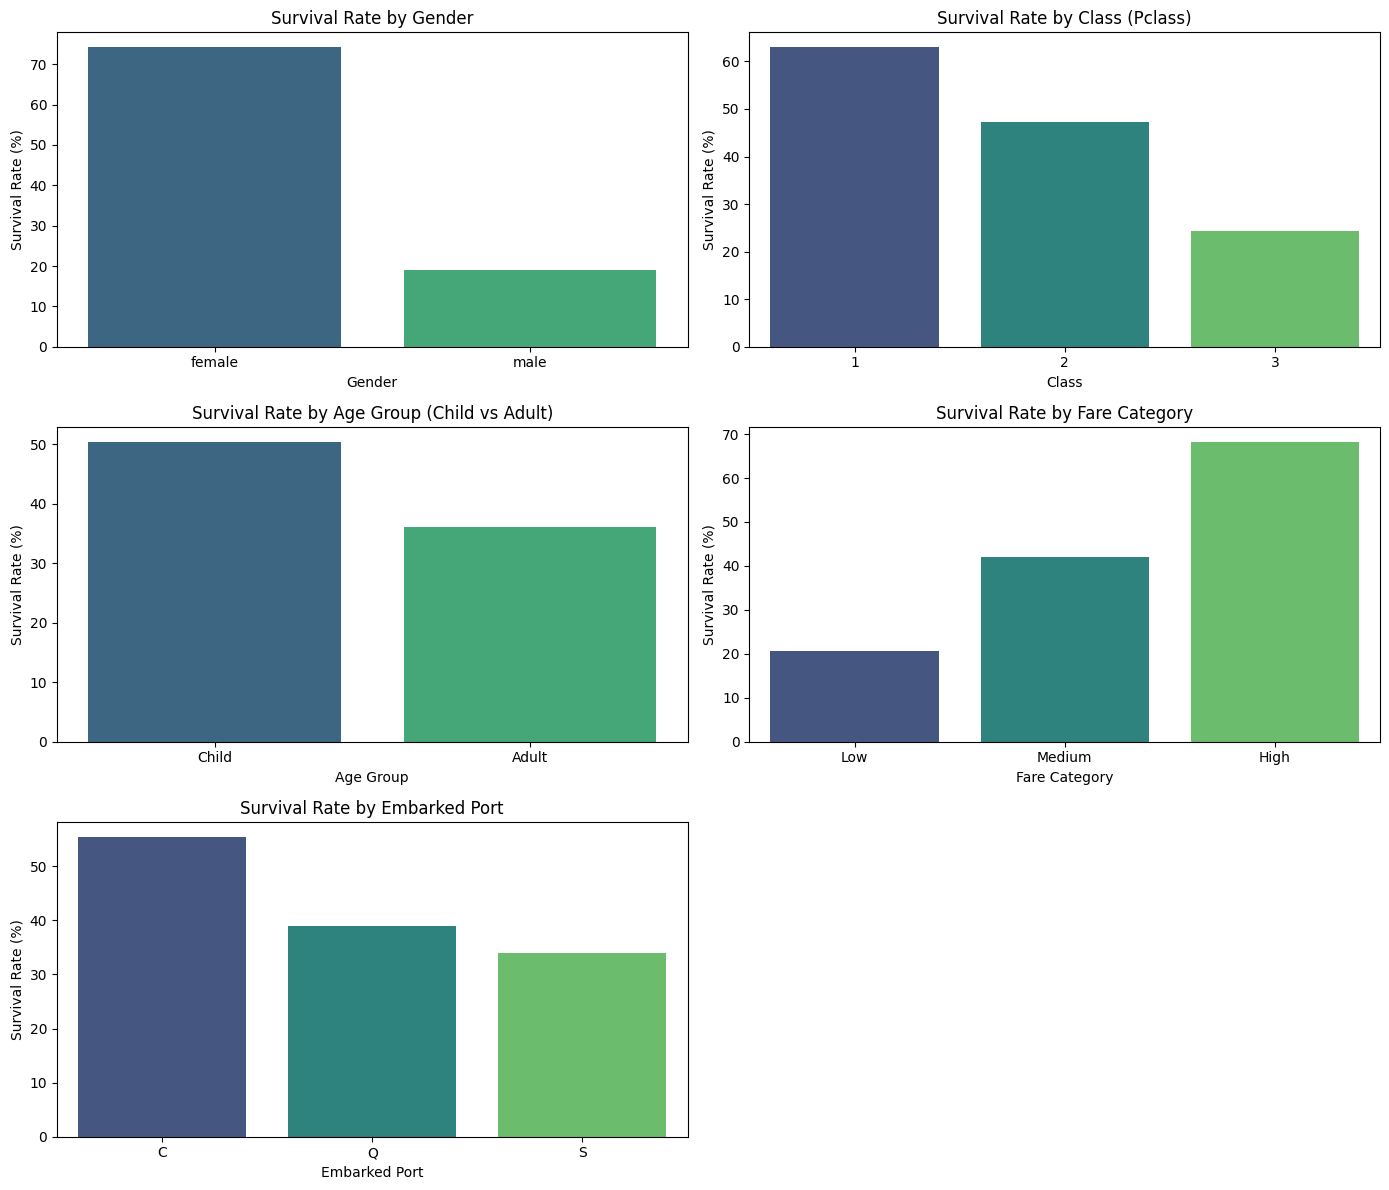

In [30]:

# 1. Survival Rate by Gender

survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100

# 2. Survival Rate by Class (Pclass)

survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

# 3. Survival Rate by Age (Children vs Adults)

bins = [0,18,100]
labels = ['Child','Adult']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
survival_by_age_group = df.groupby('Age_Group')['Survived'].mean() * 100

# 4. Survival Rate by Fare (Categorizing fare into low, medium, and high)

bins = [0, 10, 50, 600]
labels = ['Low', 'Medium', 'High']
df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)
survival_by_fare_category = df.groupby('Fare_Category')['Survived'].mean() * 100

# 5. Survival Rate by Embarked

survival_by_embarked = df.groupby('Embarked')['Survived'].mean() * 100



fig, axes = plt.subplots(3, 2, figsize=(14, 12))  

# Plot 1: Survival Rate by Gender

sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Survival Rate by Gender')
axes[0, 0].set_ylabel('Survival Rate (%)')
axes[0, 0].set_xlabel('Gender')

# Plot 2: Survival Rate by Class (Pclass)

sns.barplot(x=survival_by_class.index, y=survival_by_class.values, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Survival Rate by Class (Pclass)')
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].set_xlabel('Class')

# Plot 3: Survival Rate by Age Group (Child vs Adult)

sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Survival Rate by Age Group (Child vs Adult)')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].set_xlabel('Age Group')

# Plot 4: Survival Rate by Fare Category

sns.barplot(x=survival_by_fare_category.index, y=survival_by_fare_category.values, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Survival Rate by Fare Category')
axes[1, 1].set_ylabel('Survival Rate (%)')
axes[1, 1].set_xlabel('Fare Category')

# Plot 5: Survival Rate by Embarked

sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Survival Rate by Embarked Port')
axes[2, 0].set_ylabel('Survival Rate (%)')
axes[2, 0].set_xlabel('Embarked Port')


axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [57]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,Low
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,Adult,Low
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult,High
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Child,Medium
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Adult,Medium
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Child,Medium


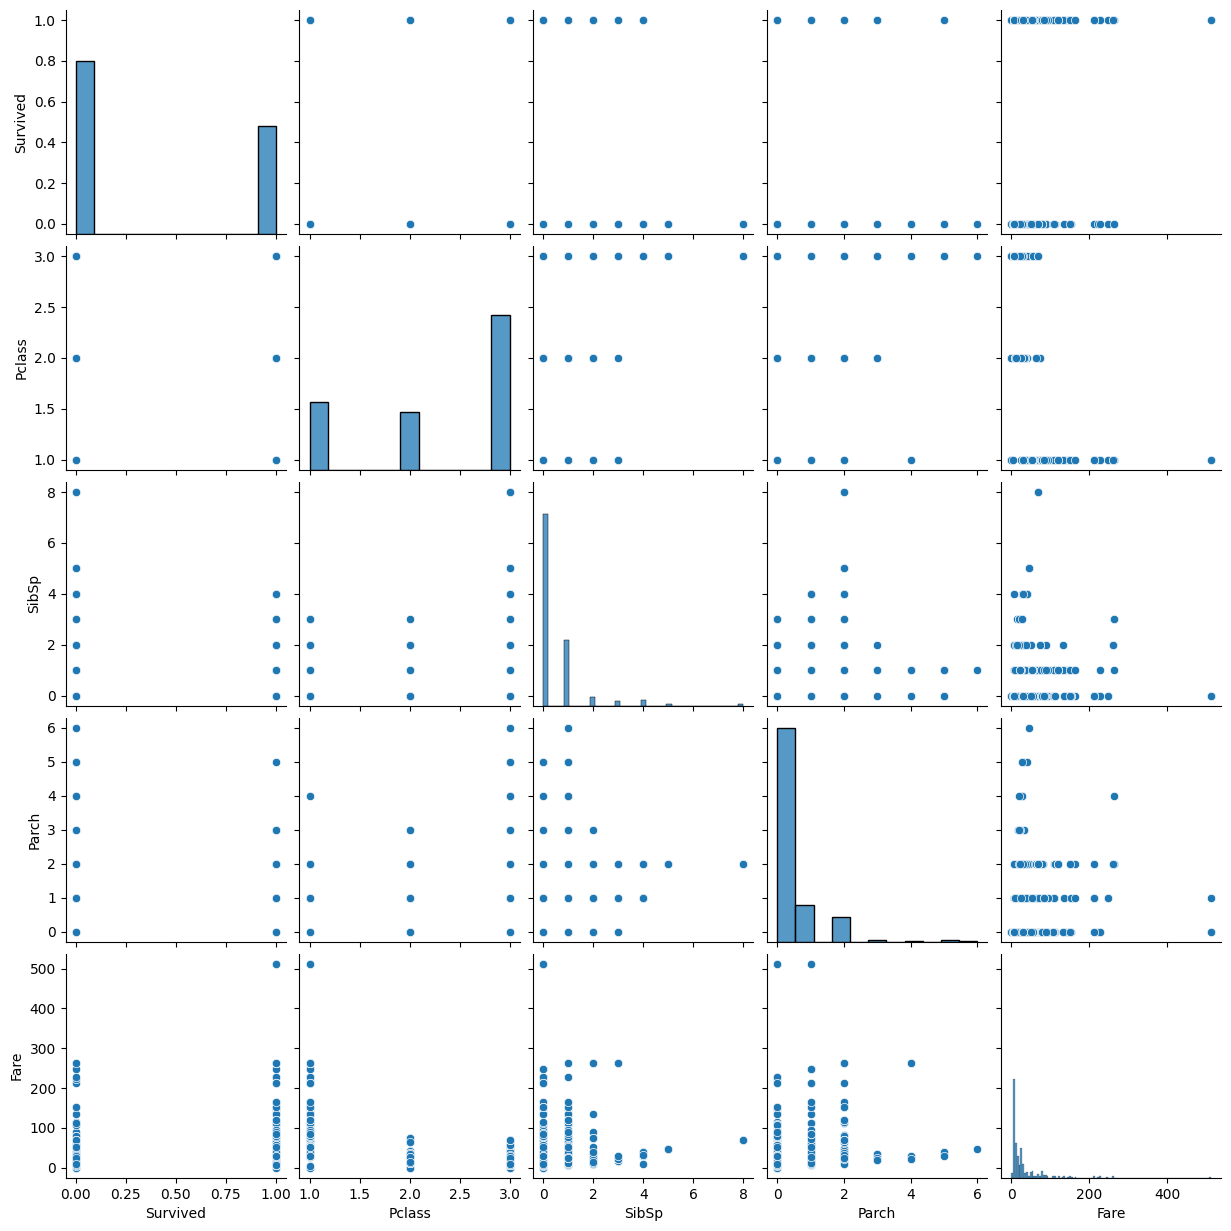

In [31]:
sns.pairplot(df,x_vars=['Survived','Pclass','SibSp','Parch','Fare'],y_vars=['Survived','Pclass','SibSp','Parch','Fare'])

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\69772002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette = 'flare')


<Axes: xlabel='Pclass', ylabel='Age'>

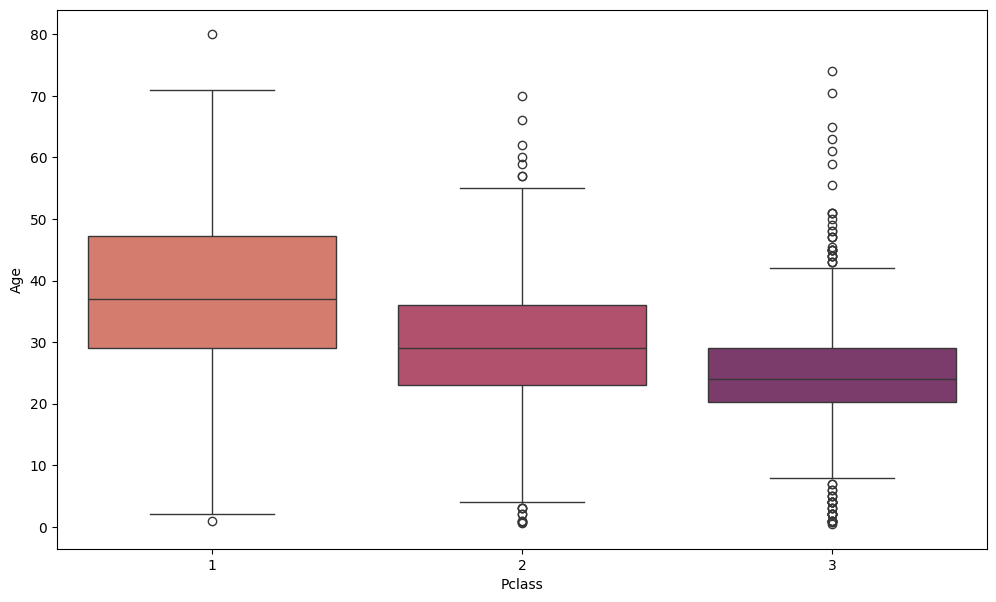

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette = 'flare')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\2700284713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex',y='Age',data=df,palette = 'flare')


<Axes: xlabel='Sex', ylabel='Age'>

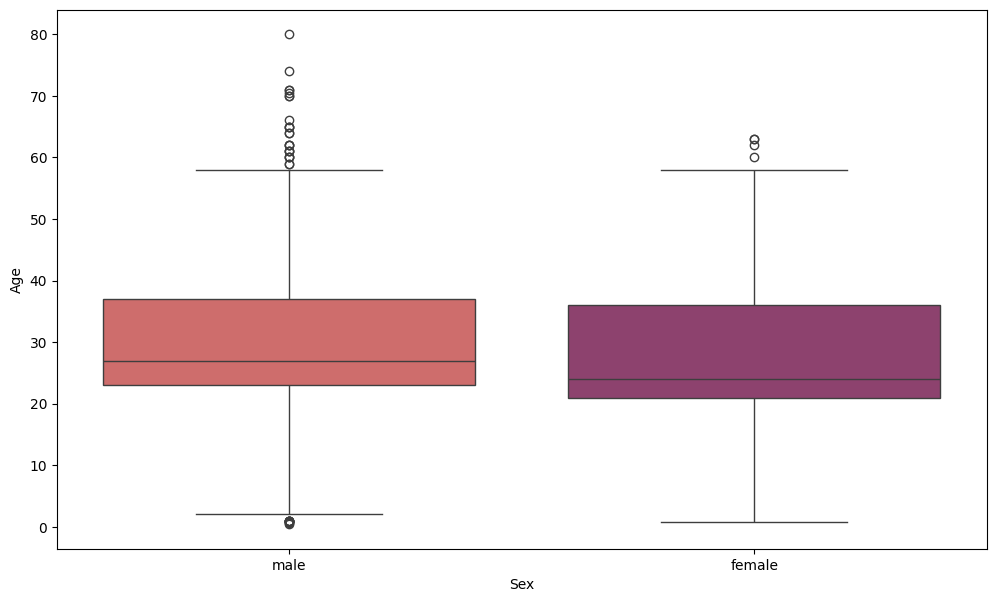

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=df,palette = 'flare')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\2328495494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived',y='Age',data=df,palette = 'flare')


<Axes: xlabel='Survived', ylabel='Age'>

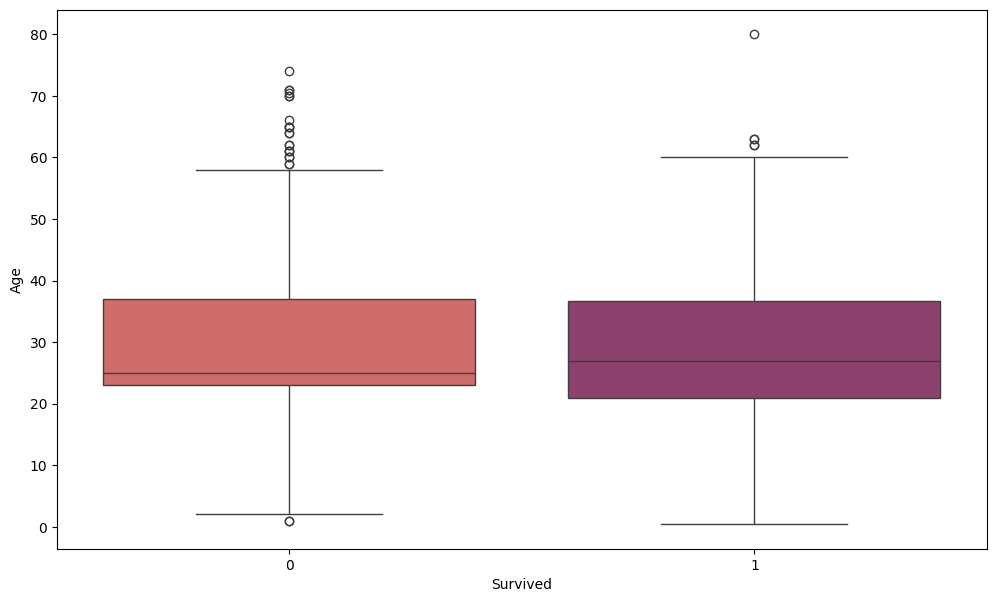

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Survived',y='Age',data=df,palette = 'flare')

C:\Users\sudda\AppData\Local\Temp\ipykernel_33136\128867744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age',y='Embarked',data=df,palette = 'flare')


<Axes: xlabel='Age', ylabel='Embarked'>

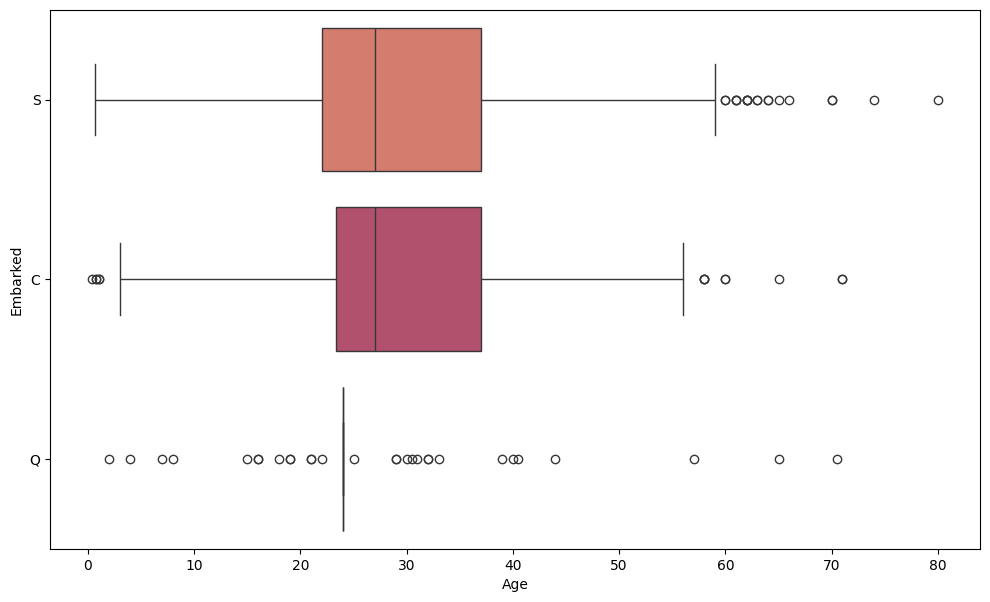

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',y='Embarked',data=df,palette = 'flare')

<Axes: xlabel='Survived', ylabel='count'>

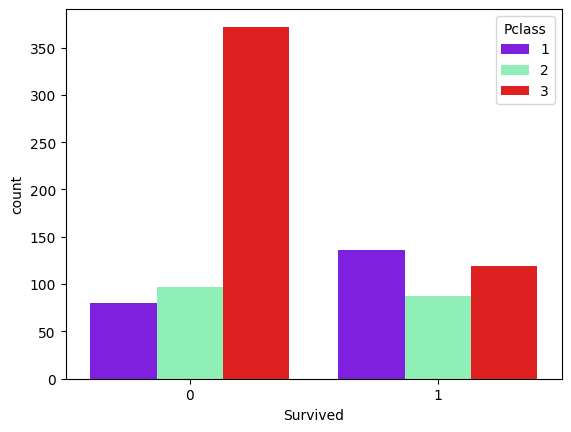

In [36]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Embarked', ylabel='count'>

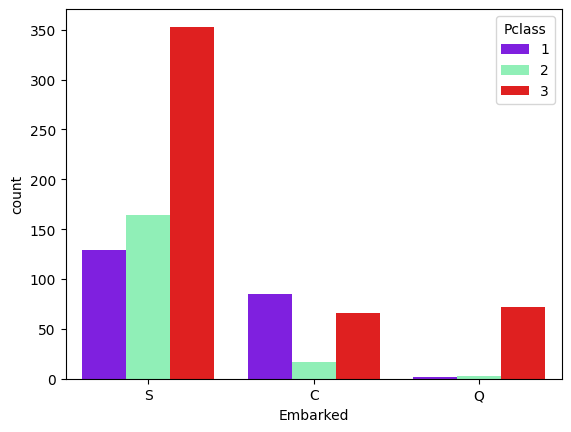

In [37]:
sns.countplot(x='Embarked',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

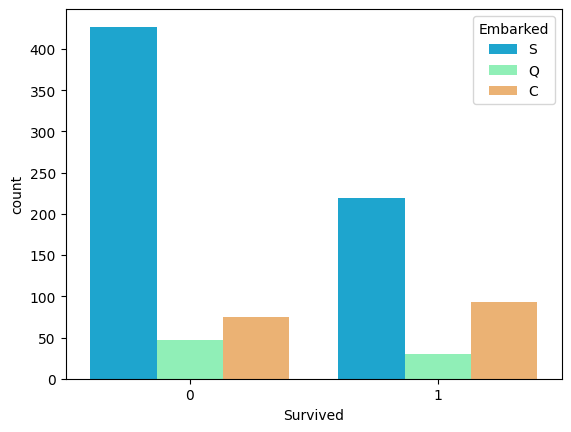

In [38]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

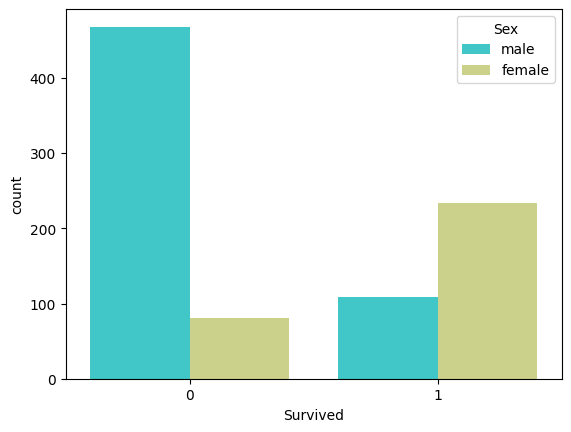

In [39]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

##  Statistical Summary

In [40]:
df1 = pd.get_dummies(df,columns = ['Pclass','Sex','Embarked'],dtype='int64')

In [41]:
df1.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Age_Group,Fare_Category,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Adult,Low,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Adult,High,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Adult,Low,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Adult,High,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Adult,Low,0,0,1,0,1,0,0,1


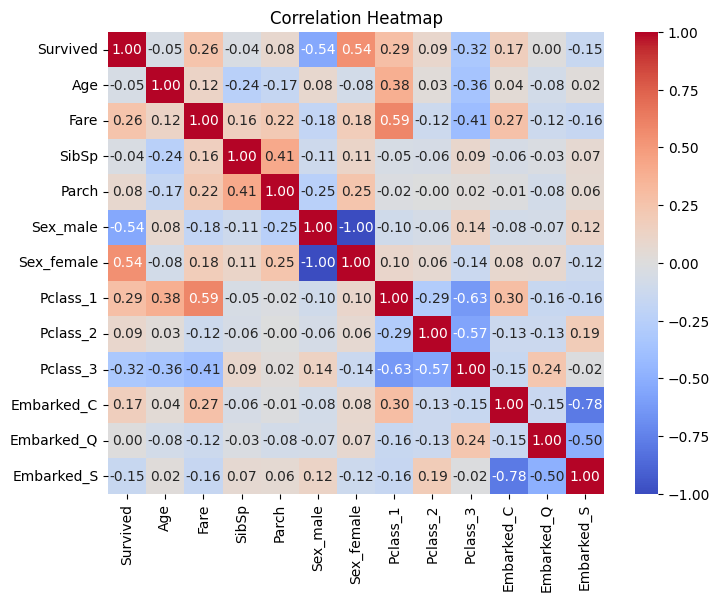

In [42]:
s_columns = ['Survived','Age','Fare','SibSp','Parch','Sex_male','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']
s_df = df1[s_columns]
correlation_matrix = s_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
threshold = 0.5
correlation_pairs = []

for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        if correlation_matrix.iloc[i, j] > threshold:
            correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))


print("Attribute pairs with strong positive correlation :", correlation_pairs)

Attribute pairs with strong positive correlation : [('Survived', 'Sex_female'), ('Fare', 'Pclass_1')]


In [44]:
threshold = -0.5
correlation_pairs = []

for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        if correlation_matrix.iloc[i, j] < threshold:
            correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))


print("Attribute pairs with strong negative correlation :", correlation_pairs)

Attribute pairs with strong negative correlation : [('Survived', 'Sex_male'), ('Sex_male', 'Sex_female'), ('Pclass_1', 'Pclass_3'), ('Pclass_2', 'Pclass_3'), ('Embarked_C', 'Embarked_S')]


## 5 key observations

1. Survival Rate by Gender: Women had a significantly higher survival rate (74%) compared to men (18%).
2. Survival Rate by Passenger Class (Pclass): First-class passengers had the highest survival rate (62%), followed by second-class (47%) and third-class (24%).
3. Age and Survival: Children under 10 had a higher survival rate, with young passengers being prioritized for lifeboats.
4. Fare and Survival: Passengers who paid higher fares were more likely to survive, reflecting better access to lifeboats and accommodations.
5. Embarked Port and Survival: Passengers who boarded from Cherbourg had a higher survival rate compared to those from Southampton or Queenstown.